In [143]:
import pandas as pd
import numpy as np
import plotly.express as px

## Reading Files
---
* dataset that query from pySpark

In [6]:
# reading file (query from pySpark)
# original_df = pd.read_csv("../PySpark_SQL/output_csv/Perth_housing_Neural.csv")
# original_df = pd.read_csv("../PySpark_SQL/output_csv/Perth_housing_ML.csv")
original_df = pd.read_csv("../DataCleaning/output/Perth_housing_ML.csv")
original_df

SUBURB    PRICE  LAND_AREA  FLOOR_AREA  CBD_DIST  \
0           South Lake   565000        600         160     18300   
1                Wandi   365000        351         139     26900   
2              Camillo   287000        719          86     22600   
3             Bellevue   255000        651          59     17900   
4            Lockridge   325000        466         131     11200   
...                ...      ...        ...         ...       ...   
31623  South Fremantle  1040000        292         245     16100   
31624      Westminster   410000        228         114      9600   
31625      Westminster   427000        261         112      9600   
31626       Girrawheen   295000        457          85     12600   
31627          Midland   295000        296          95     16700   

       NEAREST_STN_DIST  NEAREST_SCH_DIST  YEAR_SOLD    COAST_DIST  \
0                  1800          0.828339     2018.0   7553.802466   
1                  4900          5.524324     2019.0   7994.792382   
2                  1900          1.649178     2015.0  21643.941437   
3                  3600          1.571401     2018.0  26743.430605   
4                  2000          1.514922     2016.0  18311.330257   
...                 ...               ...        ...           ...   
31623              1500          1.430350     2016.0    327.438083   
31624              4600          1.679644     2017.0   8423.337128   
31625              4600          1.669159     2017.0   8424.924200   
31626              4400          0.358494     2016.0   8647.695550   
31627              1700          1.055564     2016.0  24658.482928   

       PROPERTY_AGE  
0              15.0  
1               6.0  
2              36.0  
3              65.0  
4              18.0  
...             ...  
31623           3.0  
31624           2.0  
31625           1.0  
31626          42.0  
31627          37.0  

[31628 rows x 10 columns]

In [7]:
# ensure no NaN data in df
original_df = original_df.dropna().reset_index(drop = True)
original_df

SUBURB    PRICE  LAND_AREA  FLOOR_AREA  CBD_DIST  \
0           South Lake   565000        600         160     18300   
1                Wandi   365000        351         139     26900   
2              Camillo   287000        719          86     22600   
3             Bellevue   255000        651          59     17900   
4            Lockridge   325000        466         131     11200   
...                ...      ...        ...         ...       ...   
29609  South Fremantle  1040000        292         245     16100   
29610      Westminster   410000        228         114      9600   
29611      Westminster   427000        261         112      9600   
29612       Girrawheen   295000        457          85     12600   
29613          Midland   295000        296          95     16700   

       NEAREST_STN_DIST  NEAREST_SCH_DIST  YEAR_SOLD    COAST_DIST  \
0                  1800          0.828339     2018.0   7553.802466   
1                  4900          5.524324     2019.0   7994.792382   
2                  1900          1.649178     2015.0  21643.941437   
3                  3600          1.571401     2018.0  26743.430605   
4                  2000          1.514922     2016.0  18311.330257   
...                 ...               ...        ...           ...   
29609              1500          1.430350     2016.0    327.438083   
29610              4600          1.679644     2017.0   8423.337128   
29611              4600          1.669159     2017.0   8424.924200   
29612              4400          0.358494     2016.0   8647.695550   
29613              1700          1.055564     2016.0  24658.482928   

       PROPERTY_AGE  
0              15.0  
1               6.0  
2              36.0  
3              65.0  
4              18.0  
...             ...  
29609           3.0  
29610           2.0  
29611           1.0  
29612          42.0  
29613          37.0  

[29614 rows x 10 columns]

## Using Neural Network to predict the price of a property in Perth
---

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPRegressor
from sklearn.model_selection import RandomizedSearchCV
import matplotlib.pyplot as plt

In [9]:
nn_df = original_df.drop(columns = ["SUBURB"])
nn_df.head()

PRICE  LAND_AREA  FLOOR_AREA  CBD_DIST  NEAREST_STN_DIST  \
0  565000        600         160     18300              1800   
1  365000        351         139     26900              4900   
2  287000        719          86     22600              1900   
3  255000        651          59     17900              3600   
4  325000        466         131     11200              2000   

   NEAREST_SCH_DIST  YEAR_SOLD    COAST_DIST  PROPERTY_AGE  
0          0.828339     2018.0   7553.802466          15.0  
1          5.524324     2019.0   7994.792382           6.0  
2          1.649178     2015.0  21643.941437          36.0  
3          1.571401     2018.0  26743.430605          65.0  
4          1.514922     2016.0  18311.330257          18.0

## Optimise the neural network 
---
* Using ```RandomizedSearchCV``` to search the best parameters

In [10]:
# Split our preprocessed data into our features (X) and target (y) arrays
# target (y) array = PRICE, others are features (X) arrays
X = nn_df.drop(columns = ["PRICE"])
y = nn_df["PRICE"]
# Split the preprocessed data into a training and testing dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 100, test_size= 0.2)
# Create a StandardScaler instances
scaler = StandardScaler()
# Fit the StandardScaler
X_scaler = scaler.fit(X_train)
# Scale the data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [11]:
hidden_layer_configs = []
for layers in range(3,6):
    dum = list(np.linspace(150, 10, num = layers).astype(int))
    dum1 = list(np.linspace(200, 10, num = layers).astype(int))
    dum2 = list(np.linspace(100, 10, num = layers).astype(int))
    hidden_layer_configs.append(dum)
    hidden_layer_configs.append(dum1)
    hidden_layer_configs.append(dum2)
print(hidden_layer_configs)

[[150, 80, 10], [200, 105, 10], [100, 55, 10], [150, 103, 56, 10], [200, 136, 73, 10], [100, 70, 40, 10], [150, 115, 80, 45, 10], [200, 152, 105, 57, 10], [100, 77, 55, 32, 10]]


In [12]:
model = MLPRegressor()
param_grid = {
    'hidden_layer_sizes': hidden_layer_configs,
    'max_iter': [100, 500, 1000, 1500],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001, 0.01],
    'learning_rate': ['constant', 'adaptive']
}

In [13]:
random_search = RandomizedSearchCV(model, param_distributions=param_grid, n_iter=30, cv=3)
random_search.fit(X_train_scaled, y_train)

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  ConvergenceWarning,
/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/sklearn/neural_network/_multilayer_perceptron.py:696: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  Converg

RandomizedSearchCV(cv=3, estimator=MLPRegressor(), n_iter=30,
                   param_distributions={'activation': ['relu', 'tanh'],
                                        'alpha': [0.0001, 0.001, 0.01],
                                        'hidden_layer_sizes': [[150, 80, 10],
                                                               [200, 105, 10],
                                                               [100, 55, 10],
                                                               [150, 103, 56,
                                                                10],
                                                               [200, 136, 73,
                                                                10],
                                                               [100, 70, 40,
                                                                10],
                                                               [150, 115, 80,
                                         

In [137]:
print(random_search.best_params_)

{'solver': 'adam', 'max_iter': 1000, 'learning_rate': 'constant', 'hidden_layer_sizes': [100, 70, 40, 10], 'alpha': 0.001, 'activation': 'relu'}


In [136]:
def neural_network(cluster_df, random):
    # Split our preprocessed data into our features (X) and target (y) arrays
    # target (y) array = PRICE, others are features (X) arrays
    X = cluster_df.drop(columns = ["PRICE"])
    y = cluster_df["PRICE"]

    # Split the preprocessed data into a training and testing dataset
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 50, test_size= 0.2)

    # Create a StandardScaler instances
    scaler = StandardScaler()

    # Fit the StandardScaler
    X_scaler = scaler.fit(X_train)

    # Scale the data
    X_train_scaled = X_scaler.transform(X_train)
    X_test_scaled = X_scaler.transform(X_test)

    # set up model
    model = MLPRegressor(hidden_layer_sizes= [100, 70, 40, 10], activation = "relu", solver = "adam", max_iter= 1200, learning_rate = "constant",
                         alpha = 0.001, random_state= random)

    # fit X, Y train into model
    model.fit(X_train_scaled, y_train)

    # loss list to create loss curve
    loss = model.loss_curve_
    # create a list for steps (x-axis)
    steps = range(1, len(loss) + 1)

    # put in score into the legend 
    score = str(model.score(X_test_scaled, y_test))
    # for ploting predict y and true y 
    y_pred = model.predict(X_test_scaled)

    # define the min and max for the whole predict y list
    min_value = y_pred.min()
    max_value = y_pred.max()

    # plot loss curve and predictVStrue plot
    fig, ax = plt.subplots(1, 2, figsize = (15,6))
    ax[0].plot(steps, loss, label = score)
    ax[0].set_xlabel('Step')
    ax[0].set_ylabel('Loss')
    ax[0].set_title('Loss Curve')
    ax[0].legend()
    
    ax[1].scatter(y_pred, y_test)
    ax[1].set_xlabel('Predicted Price')
    ax[1].set_ylabel('Actual Price')
    ax[1].plot([min_value,max_value], [min_value,max_value], color = "black")
    plt.show()

    return model

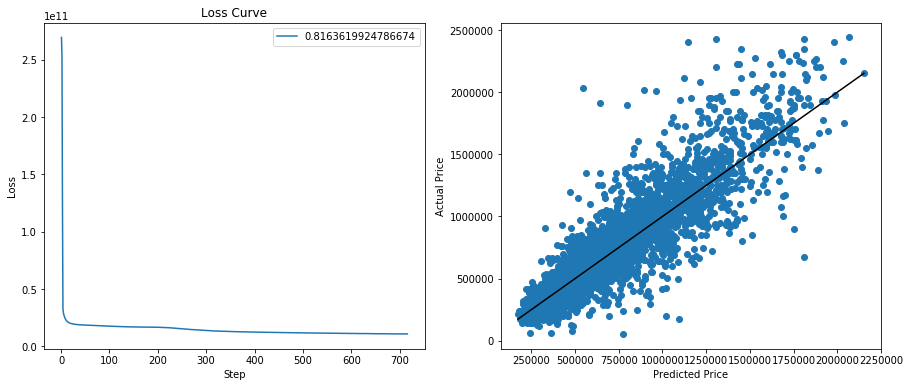

In [138]:
model_ = neural_network(nn_df, 40)

## PCA clustering
---

In [37]:
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import hvplot.pandas

### Functions for calculating clustering and intertia

In [38]:
# function for calculate inertia
def cal_inertia(df, k_list):
    # Create an empty list to store the inertia values
    inertia = []
    # Create a for loop to compute the inertia with each possible value of k
    for i in k_list:
        # Create a KMeans model using the loop counter for the n_clusters
        k_mean = KMeans(n_clusters= i, random_state= 0)
        # Fit the model to the data using `df_market_data_scaled`
        k_mean.fit(df)
        # Append the model.inertia_ to the inertia list
        inertia.append(k_mean.inertia_)
    return inertia

In [39]:
def clustering(num_cluster, df):
    # Initialise the K-Means model using the best value for k
    model = KMeans(n_clusters= num_cluster, random_state= 0) 
    # Fit the K-Means model using the original data
    model.fit(df)
    # Predict the clusters to group the cryptocurrencies using the original data
    predictions = model.predict(df)
    
    return predictions

### Reading moditfy the dataframe for PCA

In [42]:
pca_df = original_df.drop(columns= ["SUBURB"])
# , "YEAR_SOLD", "NEAREST_STN_DIST","NEAREST_SCH_DIST"
pca_df.head()

PRICE  LAND_AREA  FLOOR_AREA  CBD_DIST  NEAREST_STN_DIST  \
0  565000        600         160     18300              1800   
1  365000        351         139     26900              4900   
2  287000        719          86     22600              1900   
3  255000        651          59     17900              3600   
4  325000        466         131     11200              2000   

   NEAREST_SCH_DIST  YEAR_SOLD    COAST_DIST  PROPERTY_AGE  
0          0.828339     2018.0   7553.802466          15.0  
1          5.524324     2019.0   7994.792382           6.0  
2          1.649178     2015.0  21643.941437          36.0  
3          1.571401     2018.0  26743.430605          65.0  
4          1.514922     2016.0  18311.330257          18.0

In [43]:
# using StandardScaler to normalize the data
scaled_data = StandardScaler().fit_transform(pca_df)

# Create a PCA model instance and set number of components to 5.
pca = PCA(n_components= 5)

# Use the PCA model with `fit_transform` to reduce to five principal components.
house_pca = pca.fit_transform(scaled_data)

# put it into a new dataframe
house_pca_df = pd.DataFrame(data= house_pca, columns=["PC1", "PC2", "PC3", "PC4", "PC5"], index= pca_df.index)
house_pca_df.head()

PC1       PC2       PC3       PC4       PC5
0 -0.769027 -0.465654 -0.596790 -0.143566  0.241376
1  1.395846 -0.707602 -1.308696  0.625699 -0.209826
2  0.340429 -1.726948  1.133470 -0.551921  0.470709
3  0.088479 -2.056958  1.901631  1.011920 -0.630072
4 -0.119355 -1.060100  0.641133 -0.875585  0.153901

In [44]:
# determine how much information can be attributed to each principal component.
pca.explained_variance_ratio_

array([0.2769148 , 0.18607352, 0.14885416, 0.11007782, 0.09128675])

In [45]:
# Create a list with the number of k-values from 1 to 10
kValues = list(np.arange(1, 11))

# calculate inertia for pca data
inertia_pca = cal_inertia(pca_df, kValues) # calculate inertia for pca data
print(inertia_pca)

[3699107022481144.5, 1293856767136399.8, 644393898630535.8, 403012546650112.94, 258039424155633.2, 195510729224323.94, 146384772201784.88, 116607228160007.77, 95524630537029.75, 80293509409922.06]


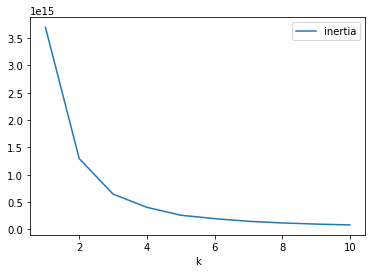

In [48]:
# Create a DataFrame with the data to plot the Elbow curve
elbow_pca_df = pd.DataFrame({"k": kValues, "inertia": inertia_pca})
elbow_pca_df.head()

# Plot a line chart to identify the k values
elbow_pca_df.plot(x= "k", y= "inertia")

In [49]:
# Predict the clusters to group them into 3 cluster
predictions_PCA  = clustering(3, pca_df) 
print(predictions_PCA)

[0 0 0 ... 0 0 0]


In [149]:
# Create a copy of the DataFrame with the PCA data
house_pca_cluster_df = house_pca_df.copy()

# Add a new column to the DataFrame with the predicted clusters
house_pca_cluster_df["predicted clusters"] = predictions_PCA

# Display sample data
house_pca_cluster_df.head()

# house_pca_cluster_df.hvplot.scatter(x= "PC1", y= "PC2", 
#                                  by= "predicted clusters", size = 1)


fig = px.scatter_3d(house_pca_cluster_df, x= "PC1", y= "PC2",  z="PC3", 
              color="predicted clusters")
fig.update_traces(marker_size= 2)
fig.show()



## Kmeans Clustering
---

In [150]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [151]:
# remove columns before scaling data
df = original_df.drop(columns= ["SUBURB", "NEAREST_STN_DIST", "FLOOR_AREA", "NEAREST_SCH_DIST", "PROPERTY_AGE", "YEAR_SOLD"])
df

PRICE  LAND_AREA  CBD_DIST    COAST_DIST
0       565000        600     18300   7553.802466
1       365000        351     26900   7994.792382
2       287000        719     22600  21643.941437
3       255000        651     17900  26743.430605
4       325000        466     11200  18311.330257
...        ...        ...       ...           ...
29609  1040000        292     16100    327.438083
29610   410000        228      9600   8423.337128
29611   427000        261      9600   8424.924200
29612   295000        457     12600   8647.695550
29613   295000        296     16700  24658.482928

[29614 rows x 4 columns]

In [152]:
# using StandardScaler to normalize the data
scaled_data = StandardScaler().fit_transform(df)

# Create a DataFrame with the scaled data 
df_scaled = pd.DataFrame(scaled_data, columns= df.columns[:], index= df.index)

# Display sample data
df_scaled.head()

PRICE  LAND_AREA  CBD_DIST  COAST_DIST
0 -0.224124  -0.116712 -0.111083   -0.454018
1 -0.790934  -0.136588  0.645183   -0.410262
2 -1.011990  -0.107213  0.267050    0.944027
3 -1.102680  -0.112641 -0.146259    1.450006
4 -0.904296  -0.127408 -0.735443    0.613360

In [131]:
# Create a list with the number of k-values from 1 to 11
k_Values = list(np.arange(1, 12))

# Create an empty list to store the inertia values
inertia = cal_inertia(df_scaled, k_Values) # calculate inertia

print(inertia)

[118456.00000000017, 92439.2019143761, 71667.33891846964, 53429.204782541274, 40427.620074983715, 34566.163948574336, 30926.767613085693, 27707.279980068204, 24711.601728486043, 22475.120972004643, 20475.704220579028]


In [132]:
# Create a DataFrame with the data to plot the Elbow curve
elbow_df = pd.DataFrame({"k": k_Values, "inertia": inertia})
elbow_df.head()

k        inertia
0  1  118456.000000
1  2   92439.201914
2  3   71667.338918
3  4   53429.204783
4  5   40427.620075

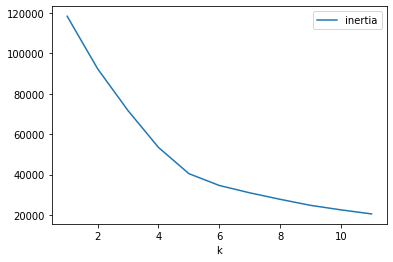

In [133]:
# Plot a line chart with all the inertia values computed with 
elbow_df.plot(x= "k", y= "inertia")

In [183]:
predictions = clustering(5, df_scaled) # getting clustering results
# Print the resulting array of cluster values.
print(predictions)

# Create a copy of the DataFrame
house_cluster_df = original_df.copy()
# Add a new column to the DataFrame with the predicted clusters
house_cluster_df["predicted clusters"] = predictions

# Display sample data
house_cluster_df.head()

[3 2 0 ... 3 3 0]


SUBURB   PRICE  LAND_AREA  FLOOR_AREA  CBD_DIST  NEAREST_STN_DIST  \
0  South Lake  565000        600         160     18300              1800   
1       Wandi  365000        351         139     26900              4900   
2     Camillo  287000        719          86     22600              1900   
3    Bellevue  255000        651          59     17900              3600   
4   Lockridge  325000        466         131     11200              2000   

   NEAREST_SCH_DIST  YEAR_SOLD    COAST_DIST  PROPERTY_AGE  predicted clusters  
0          0.828339     2018.0   7553.802466          15.0                   3  
1          5.524324     2019.0   7994.792382           6.0                   2  
2          1.649178     2015.0  21643.941437          36.0                   0  
3          1.571401     2018.0  26743.430605          65.0                   0  
4          1.514922     2016.0  18311.330257          18.0                   3

In [158]:
fig = px.scatter_3d(house_cluster_df, x= "COAST_DIST",  y="CBD_DIST", z= "PRICE",
              color="predicted clusters")
fig.update_traces(marker_size= 2)
fig.show()

In [159]:
# understand the group distribution
count_grp = house_cluster_df.groupby("predicted clusters")
# create a dataframe for easier visualise data
count_grp_df = count_grp["PRICE"].count().reset_index()
count_grp_df = count_grp_df.rename(columns= {"PRICE": "count"})
count_grp_df

predicted clusters  count
0                   0   7282
1                   1     30
2                   2   5745
3                   3  13005
4                   4   3552

In [160]:
# median of each column
median_grp = house_cluster_df.groupby("predicted clusters").median()
median_grp

PRICE  LAND_AREA  FLOOR_AREA  CBD_DIST  \
predicted clusters                                               
0                    475000.0      809.0       167.0   20900.0   
1                   1030000.0   254766.0       217.0   42000.0   
2                    416000.0      608.0       170.0   34200.0   
3                    565000.0      618.0       159.0   12400.0   
4                   1300000.0      704.0       251.0    9000.0   

                    NEAREST_STN_DIST  NEAREST_SCH_DIST  YEAR_SOLD  \
predicted clusters                                                  
0                             5600.0          1.889141     2016.0   
1                            25250.0         10.633104     2015.0   
2                             2800.0          1.355675     2018.0   
3                             2900.0          1.173951     2018.0   
4                             2400.0          1.211143     2017.0   

                      COAST_DIST  PROPERTY_AGE  
predicted clusters                              
0                   24737.198933          21.0  
1                   41405.538105          21.0  
2                    2574.777989          16.0  
3                    8823.937129          25.0  
4                    4108.587512          26.0

In [161]:
# mean of each column
mean_grp = house_cluster_df.groupby("predicted clusters").mean()
mean_grp

PRICE      LAND_AREA  FLOOR_AREA      CBD_DIST  \
predicted clusters                                                          
0                   5.145307e+05    4124.143230  177.429827  22893.078275   
1                   1.132250e+06  309811.500000  232.733333  42903.333333   
2                   4.551261e+05    1260.879373  176.858660  35840.382942   
3                   5.930921e+05     705.005998  166.820684  13005.425836   
4                   1.397864e+06    1500.274212  256.905968  10222.862613   

                    NEAREST_STN_DIST  NEAREST_SCH_DIST    YEAR_SOLD  \
predicted clusters                                                    
0                        7597.038726          2.587390  2016.330129   
1                       21593.333333         11.123168  2015.333333   
2                        3836.199826          1.887797  2017.792515   
3                        3144.551096          1.274666  2017.474433   
4                        2678.032658          1.377022  2017.210586   

                      COAST_DIST  PROPERTY_AGE  
predicted clusters                              
0                   26429.075321     25.131695  
1                   33594.710427     30.166667  
2                    3752.621667     18.905831  
3                    9587.093003     29.279969  
4                    5490.626195     36.359516

## Extracting different clusters to create better model
---

In [162]:
# set up required columns
columns = ['PRICE', 'LAND_AREA', 'FLOOR_AREA', 'YEAR_SOLD', 'CBD_DIST', 'NEAREST_STN_DIST', 'PROPERTY_AGE']

In [163]:
# cluster 0 dataframe
cluster_0_df = house_cluster_df.loc[(house_cluster_df["predicted clusters"] == 0), columns].dropna().reset_index(drop= True)
cluster_0_df

PRICE  LAND_AREA  FLOOR_AREA  YEAR_SOLD  CBD_DIST  NEAREST_STN_DIST  \
0     287000        719          86     2015.0     22600              1900   
1     255000        651          59     2018.0     17900              3600   
2     409000        759         118     2013.0     27300              1000   
3     400000        386         132     2016.0     28200              3700   
4     675000       2538         241     2014.0     22900             10700   
...      ...        ...         ...        ...       ...               ...   
7277  525000       2010         195     2016.0     26700              4600   
7278  330000       1013         130     2015.0     16900              1900   
7279  240000        480         112     2019.0     16800               917   
7280  467000        400         132     2015.0     17100              2500   
7281  295000        296          95     2016.0     16700              1700   

      PROPERTY_AGE  
0             36.0  
1             65.0  
2             22.0  
3              2.0  
4             37.0  
...            ...  
7277           7.0  
7278           8.0  
7279          41.0  
7280           1.0  
7281          37.0  

[7282 rows x 7 columns]

In [166]:
# cluster 2 dataframe 
cluster_2_df = house_cluster_df.loc[(house_cluster_df["predicted clusters"] == 2), columns].dropna().reset_index(drop= True)
cluster_2_df

PRICE  LAND_AREA  FLOOR_AREA  YEAR_SOLD  CBD_DIST  NEAREST_STN_DIST  \
0     365000        351         139     2019.0     26900              4900   
1     370000        468         158     2019.0     41700              1100   
2     367500        398         158     2018.0     36300              2100   
3     515000        388         160     2014.0     25000              3300   
4     420000        600         295     2015.0     54500             10400   
...      ...        ...         ...        ...       ...               ...   
5740  375000        448         122     2020.0     25600              1900   
5741  405000        301         135     2016.0     24000              3100   
5742  300000        146          90     2020.0     24900               733   
5743  285000       1192          86     2020.0     38400               822   
5744  423000        248         108     2016.0     24900              5700   

      PROPERTY_AGE  
0              6.0  
1              6.0  
2             15.0  
3              7.0  
4              9.0  
...            ...  
5740          28.0  
5741           4.0  
5742          20.0  
5743          27.0  
5744           5.0  

[5745 rows x 7 columns]

In [164]:
# cluster 3 dataframe
cluster_3_df = house_cluster_df.loc[(house_cluster_df["predicted clusters"] == 3), columns].dropna().reset_index(drop= True)
cluster_3_df

PRICE  LAND_AREA  FLOOR_AREA  YEAR_SOLD  CBD_DIST  NEAREST_STN_DIST  \
0      565000        600         160     2018.0     18300              1800   
1      325000        466         131     2016.0     11200              2000   
2      565000        875         168     2020.0     12100              2500   
3      685000        552         126     2019.0      5900               508   
4      300000        243          94     2019.0     11500              4800   
...       ...        ...         ...        ...       ...               ...   
13000  245000        381          85     2018.0     12600              4400   
13001  955000        200         127     2019.0     16000              1900   
13002  410000        228         114     2017.0      9600              4600   
13003  427000        261         112     2017.0      9600              4600   
13004  295000        457          85     2016.0     12600              4400   

       PROPERTY_AGE  
0              15.0  
1              18.0  
2              37.0  
3              20.0  
4              11.0  
...             ...  
13000          44.0  
13001          22.0  
13002           2.0  
13003           1.0  
13004          42.0  

[13005 rows x 7 columns]

In [165]:
# cluster 3 dataframe
cluster_4_df = house_cluster_df.loc[(house_cluster_df["predicted clusters"] == 4), columns].dropna().reset_index(drop= True)
cluster_4_df

PRICE  LAND_AREA  FLOOR_AREA  YEAR_SOLD  CBD_DIST  NEAREST_STN_DIST  \
0     1950000        855         305     2018.0     10800              2900   
1     1260000        354         227     2016.0     12900               387   
2     1100000        619         150     2016.0      8800               658   
3     1310000        544         246     2019.0      8700              4400   
4     1350000        802         266     2018.0     12000              3500   
...       ...        ...         ...        ...       ...               ...   
3547   990000        327         311     2018.0      9100              1900   
3548  1140000        476         206     2016.0      6100               925   
3549  1540000        506         441     2018.0      8300              2100   
3550  1700000        414         277     2017.0      9400               558   
3551  1040000        292         245     2016.0     16100              1500   

      PROPERTY_AGE  
0             37.0  
1             16.0  
2             71.0  
3              9.0  
4              6.0  
...            ...  
3547          11.0  
3548           1.0  
3549           9.0  
3550           8.0  
3551           3.0  

[3552 rows x 7 columns]

## Optimisation of Neural Network

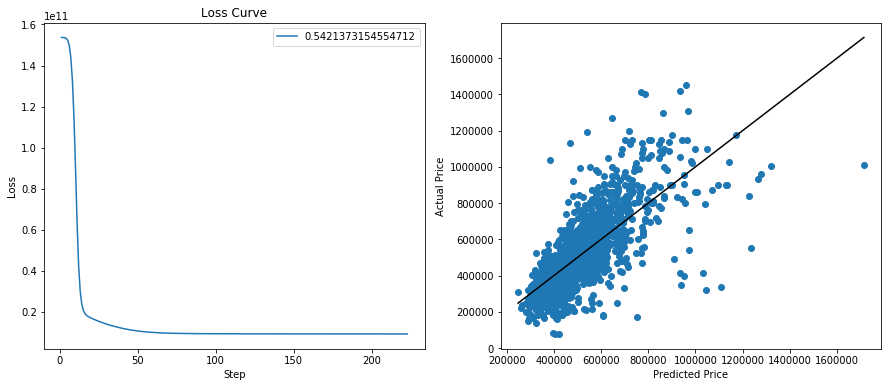

In [167]:
# cluster 0 model
model_0 = neural_network(cluster_0_df, 200)

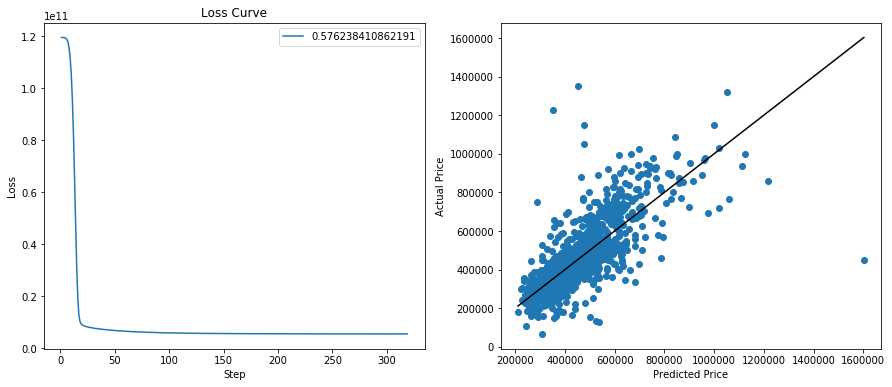

In [168]:
# cluster 2 model
model_2 = neural_network(cluster_2_df, 200)

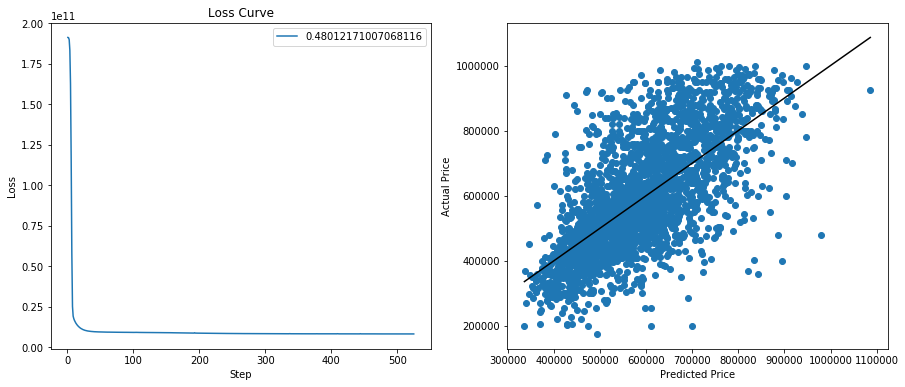

In [169]:
# cluster 3 model
model_3 = neural_network(cluster_3_df, 200)

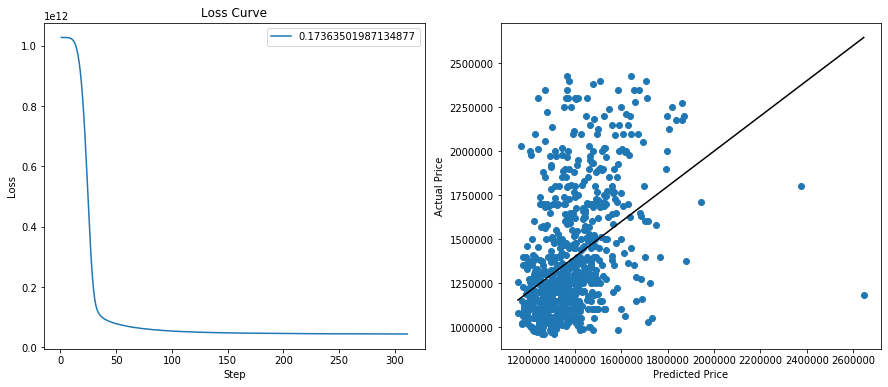

In [170]:
# cluster 3 model
model_4 = neural_network(cluster_4_df, 200)

## Grouping cluster 2 and 3 to improve the model
---

In [124]:
cluster_2_3_df = house_cluster_df.loc[(house_cluster_df["predicted clusters"] == 2)|(house_cluster_df["predicted clusters"] == 3), columns].reset_index(drop= True)
cluster_2_3_df.head()

PRICE  LAND_AREA  FLOOR_AREA  YEAR_SOLD  CBD_DIST  NEAREST_STN_DIST  \
0  287000        719          86     2015.0     22600              1900   
1  255000        651          59     2018.0     17900              3600   
2  325000        466         131     2016.0     11200              2000   
3  409000        759         118     2013.0     27300              1000   
4  400000        386         132     2016.0     28200              3700   

   PROPERTY_AGE  
0          36.0  
1          65.0  
2          18.0  
3          22.0  
4           2.0

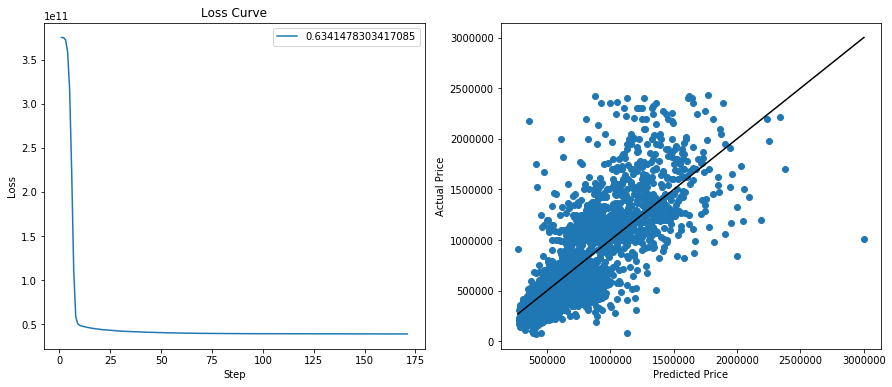

In [126]:
# cluster 1 and cluster 2 model
model_2_3 = neural_network(cluster_2_3_df, 200)

## Organise Cluster results for data visualisation
---

In [179]:
# group 5 clusters and suburb together to understand the pattern in each suburb
grp = house_cluster_df.groupby(["SUBURB", "predicted clusters"])
grp_count = grp["PRICE"].count()

# reformat the table to a readable form
suburb_cluster_count_df = grp_count.unstack()
suburb_cluster_count_df = suburb_cluster_count_df.reset_index()

# fill up the NaN with 0
suburb_cluster_count_df = suburb_cluster_count_df.fillna(0)

# sum up all columns 
suburb_cluster_count_df["total"] = suburb_cluster_count_df.sum(axis = "columns")
# drop all axis that are less than 5 counts in total
suburb_cluster_count_df = suburb_cluster_count_df.loc[suburb_cluster_count_df["total"] >= 5, :]

suburb_cluster_count_df

/opt/anaconda3/envs/PythonData/lib/python3.7/site-packages/ipykernel_launcher.py:13: FutureWarning:

Dropping of nuisance columns in DataFrame reductions (with 'numeric_only=None') is deprecated; in a future version this will raise TypeError.  Select only valid columns before calling the reduction.



predicted clusters             SUBURB     0    1      2      3     4  total
0                   Alexander Heights   0.0  0.0    0.0  114.0   0.0  114.0
1                         Alfred Cove   0.0  0.0    0.0   85.0  30.0  115.0
2                             Alkimos   0.0  1.0   99.0    0.0   0.0  100.0
3                            Anketell   0.0  0.0    7.0    0.0   5.0   12.0
4                          Applecross   0.0  0.0    0.0   25.0  53.0   78.0
..                                ...   ...  ...    ...    ...   ...    ...
315                          Wooroloo  28.0  1.0    0.0    0.0   0.0   29.0
316                           Wungong  10.0  0.0    0.0    0.0   0.0   10.0
317                           Yanchep   0.0  0.0  102.0    0.0   0.0  102.0
318                          Yangebup   0.0  0.0    0.0  114.0   0.0  114.0
319                            Yokine   0.0  0.0    0.0   48.0   3.0   51.0

[312 rows x 7 columns]

In [180]:
# change to percentage for the whole dataframe
for n in range(5):
    suburb_cluster_count_df[n] = suburb_cluster_count_df[n]/suburb_cluster_count_df["total"]

# drop the total column
suburb_cluster_percent_df = suburb_cluster_count_df.drop(columns= "total")
suburb_cluster_percent_df.columns = ["Suburb", "cluster-1", "cluster-2", "cluster-3", "cluster-4", "cluster-5"]
suburb_cluster_percent_df["Cluster group"] = suburb_cluster_percent_df[["cluster-1", "cluster-2", "cluster-3", "cluster-4", "cluster-5"]].idxmax(axis = 1)
# 
# create a new column for identify which cluster are suburb in



# reformat dataframe
suburb_cluster_percent_df.style.format({"cluster-1" : "{:.2%}", "cluster-2": "{:.2%}", "cluster-3": "{:.2%}", "cluster-4": "{:.2%}",
                                        "cluster-5" : "{:.2%}"})

In [184]:
# output dataframe
suburb_cluster_percent_df.to_csv("./output/suburb_clustering.csv", index= False)
house_cluster_df.to_csv("./output/full_clustering.csv", index = False)
